In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("E:\\materials\\Assignment\\Assignment14\\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [4]:
df["sales"]="small"
df.loc[df["Sales"]>7.50,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [5]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [7]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [8]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes',
 'sales']

In [9]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)  #

##  Building Decision Tree Classifier using Entropy Criteria

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)   #build the model
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

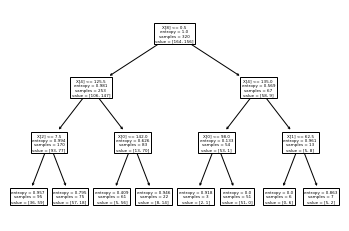

In [11]:
from sklearn import tree
tree.plot_tree(model);

In [12]:
df.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales'],
      dtype='object')

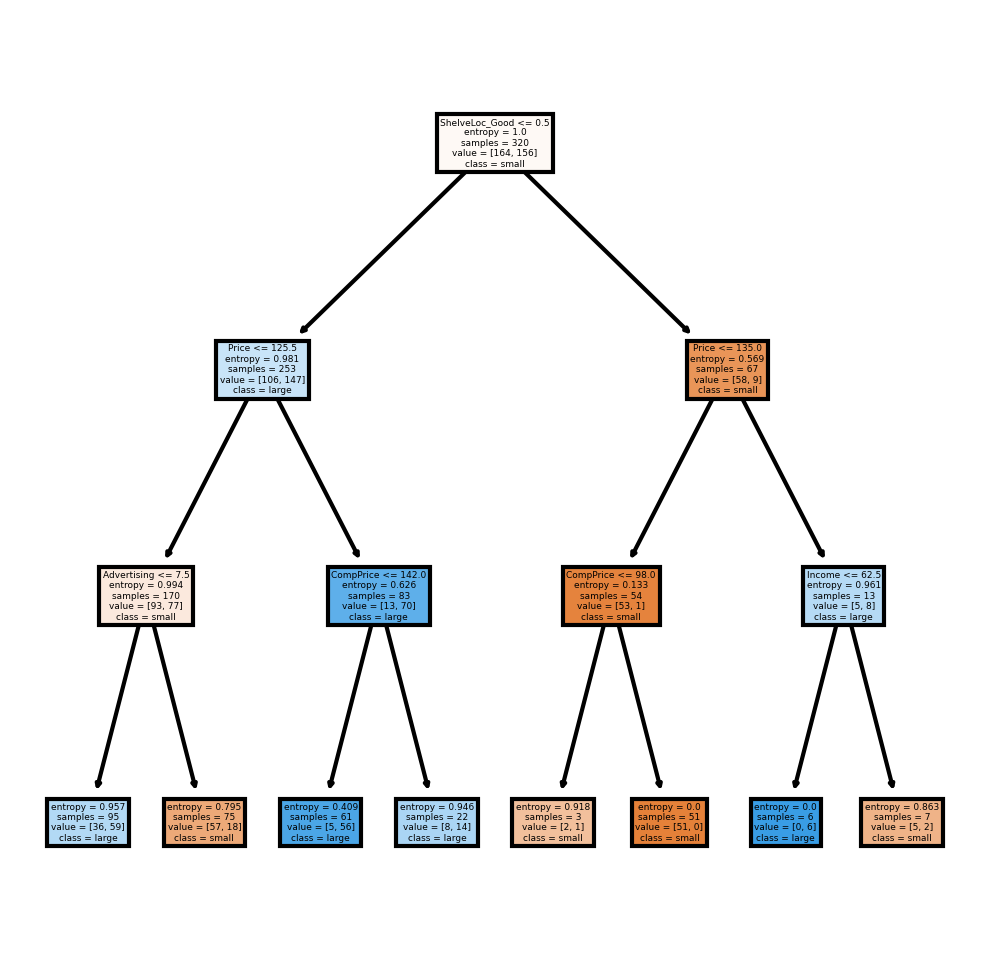

In [13]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',]   
cn=[ 'small','large']     #class name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [14]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

small    51
large    29
dtype: int64

In [15]:
preds

array(['large', 'large', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'large', 'small', 'large', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'large'], dtype=object)

In [16]:
pd.crosstab(y_test,preds)

col_0,large,small
sales,,
large,20,15
small,9,36


In [17]:
np.mean(preds==y_test)

0.7

In [18]:
pred_train = model.predict(x_train)

In [19]:
confusion_matrix(y_train,pred_train)

array([[115,  49],
       [ 21, 135]], dtype=int64)

## Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7

In [23]:
confusion_matrix(y_test,pred)

array([[20, 15],
       [ 9, 36]], dtype=int64)

In [24]:
df1=pd.DataFrame({'Actual':y_test, 'Predicted':pred})

In [25]:
df1

,Actual,Predicted
132,large,large
390,small,large
310,large,small
3,small,small
248,small,small
...,...,...
361,large,large
197,small,small
23,small,small
54,small,small
